In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

C:\Python\Anaconda3-5.2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('./data/HousePrice_preprocessed_train_v1.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,1,65.0,-0.217841,0.75,0.875,1,0.75,1,0.833333,...,0.0,0.5,0.833333,-0.740634,0.199972,-0.359539,0,1,1,20.85
2,20,1,80.0,-0.072032,0.75,0.875,1,0.75,2,0.833333,...,0.0,0.5,0.833333,1.614603,-0.702722,-0.359539,0,1,1,18.15
3,60,1,68.0,0.137173,0.75,0.625,1,0.75,1,0.833333,...,0.0,0.5,0.833333,-0.740634,-0.081195,-0.359539,0,1,1,22.35
4,70,1,60.0,-0.078371,0.75,0.625,1,0.75,3,0.833333,...,0.0,0.5,0.833333,-0.740634,-0.184783,3.874303,0,1,2,14.00
5,60,1,84.0,0.518814,0.75,0.625,1,0.75,2,0.833333,...,0.0,0.5,0.833333,0.776834,0.540332,-0.359539,0,1,1,25.00


In [3]:
# seed 값 설정
seed = 0
np.random.seed(seed)
# Scaler
scale = StandardScaler()
x_train = df[:]
x_train = scale.fit_transform(x_train)

y = df['SalePrice'].values
# train : test = 7 : 3
x_train, x_test, y_train, y_test = train_test_split(x_train, y, test_size = 0.3, random_state = seed)

In [4]:
# model 구성
model = Sequential()
model.add(Dense(10, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(1))
# model 학습과정 설정
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = [metrics.mae])

In [5]:
# model 학습
hist = model.fit(x_train, y_train, epochs = 200, batch_size = 10, validation_data = (x_test, y_test))

Train on 1022 samples, validate on 438 samples
Epoch 1/200
1022/1022 [==============================] - 0s 351us/step - loss: 234.4109 - mean_absolute_error: 12.8674 - val_loss: 48.3505 - val_mean_absolute_error: 4.8061
Epoch 2/200
1022/1022 [==============================] - 0s 115us/step - loss: 29.5655 - mean_absolute_error: 4.1231 - val_loss: 31.0488 - val_mean_absolute_error: 3.6347
Epoch 3/200
1022/1022 [==============================] - 0s 121us/step - loss: 18.2750 - mean_absolute_error: 3.1564 - val_loss: 25.2524 - val_mean_absolute_error: 2.9646
Epoch 4/200
1022/1022 [==============================] - 0s 111us/step - loss: 13.3313 - mean_absolute_error: 2.6881 - val_loss: 22.3024 - val_mean_absolute_error: 2.7128
Epoch 5/200
1022/1022 [==============================] - 0s 113us/step - loss: 10.8404 - mean_absolute_error: 2.4031 - val_loss: 19.3591 - val_mean_absolute_error: 2.4976
Epoch 6/200
1022/1022 [==============================] - 0s 112us/step - loss: 8.9573 - mean_abs

Epoch 49/200
1022/1022 [==============================] - 0s 101us/step - loss: 0.4720 - mean_absolute_error: 0.5327 - val_loss: 3.0637 - val_mean_absolute_error: 1.0810
Epoch 50/200
1022/1022 [==============================] - 0s 107us/step - loss: 0.4507 - mean_absolute_error: 0.5215 - val_loss: 2.9137 - val_mean_absolute_error: 1.0353
Epoch 51/200
1022/1022 [==============================] - 0s 104us/step - loss: 0.4507 - mean_absolute_error: 0.5160 - val_loss: 2.9479 - val_mean_absolute_error: 1.0619
Epoch 52/200
1022/1022 [==============================] - 0s 104us/step - loss: 0.4729 - mean_absolute_error: 0.5290 - val_loss: 2.9225 - val_mean_absolute_error: 1.0276
Epoch 53/200
1022/1022 [==============================] - 0s 105us/step - loss: 0.4492 - mean_absolute_error: 0.5093 - val_loss: 2.8216 - val_mean_absolute_error: 1.0193
Epoch 54/200
1022/1022 [==============================] - 0s 102us/step - loss: 0.3898 - mean_absolute_error: 0.4780 - val_loss: 2.8103 - val_mean_abs

1022/1022 [==============================] - 0s 104us/step - loss: 0.1579 - mean_absolute_error: 0.2973 - val_loss: 2.0644 - val_mean_absolute_error: 0.7550
Epoch 98/200
1022/1022 [==============================] - 0s 105us/step - loss: 0.1023 - mean_absolute_error: 0.2396 - val_loss: 2.0606 - val_mean_absolute_error: 0.7562
Epoch 99/200
1022/1022 [==============================] - 0s 126us/step - loss: 0.1163 - mean_absolute_error: 0.2547 - val_loss: 1.9909 - val_mean_absolute_error: 0.7307
Epoch 100/200
1022/1022 [==============================] - 0s 103us/step - loss: 0.1338 - mean_absolute_error: 0.2724 - val_loss: 2.0003 - val_mean_absolute_error: 0.6909
Epoch 101/200
1022/1022 [==============================] - 0s 104us/step - loss: 0.1433 - mean_absolute_error: 0.2757 - val_loss: 1.9748 - val_mean_absolute_error: 0.7166
Epoch 102/200
1022/1022 [==============================] - 0s 98us/step - loss: 0.1531 - mean_absolute_error: 0.2841 - val_loss: 2.3819 - val_mean_absolute_error

1022/1022 [==============================] - 0s 108us/step - loss: 0.0598 - mean_absolute_error: 0.1807 - val_loss: 1.9168 - val_mean_absolute_error: 0.6411
Epoch 146/200
1022/1022 [==============================] - 0s 103us/step - loss: 0.0594 - mean_absolute_error: 0.1837 - val_loss: 1.9101 - val_mean_absolute_error: 0.6876
Epoch 147/200
1022/1022 [==============================] - 0s 104us/step - loss: 0.0960 - mean_absolute_error: 0.2306 - val_loss: 2.3632 - val_mean_absolute_error: 0.9045
Epoch 148/200
1022/1022 [==============================] - 0s 104us/step - loss: 0.0886 - mean_absolute_error: 0.2202 - val_loss: 1.8757 - val_mean_absolute_error: 0.6233
Epoch 149/200
1022/1022 [==============================] - 0s 106us/step - loss: 0.0520 - mean_absolute_error: 0.1682 - val_loss: 1.8911 - val_mean_absolute_error: 0.6263
Epoch 150/200
1022/1022 [==============================] - 0s 106us/step - loss: 0.0710 - mean_absolute_error: 0.1989 - val_loss: 2.0059 - val_mean_absolute_er

Epoch 193/200
1022/1022 [==============================] - 0s 105us/step - loss: 0.1132 - mean_absolute_error: 0.2468 - val_loss: 2.0265 - val_mean_absolute_error: 0.6793
Epoch 194/200
1022/1022 [==============================] - 0s 100us/step - loss: 0.0517 - mean_absolute_error: 0.1682 - val_loss: 1.9012 - val_mean_absolute_error: 0.5690
Epoch 195/200
1022/1022 [==============================] - 0s 101us/step - loss: 0.0251 - mean_absolute_error: 0.1174 - val_loss: 1.8961 - val_mean_absolute_error: 0.5878
Epoch 196/200
1022/1022 [==============================] - 0s 98us/step - loss: 0.0264 - mean_absolute_error: 0.1224 - val_loss: 1.9154 - val_mean_absolute_error: 0.5815
Epoch 197/200
1022/1022 [==============================] - 0s 105us/step - loss: 0.0281 - mean_absolute_error: 0.1278 - val_loss: 1.9035 - val_mean_absolute_error: 0.5679
Epoch 198/200
1022/1022 [==============================] - 0s 105us/step - loss: 0.1265 - mean_absolute_error: 0.2505 - val_loss: 1.9518 - val_mea

In [6]:
# model 평가
loss_and_metrics = model.evaluate(x_test, y_test, batch_size = 10)
print('evaluation loss and metrics\n')
print('loss : ' + str(loss_and_metrics[0]))
print('accuracy : ' + str(loss_and_metrics[1]))

438/438 [==============================] - 0s 59us/step
evaluation loss and metrics

loss : 1.8396171411524898
accuracy : 0.557460172535622


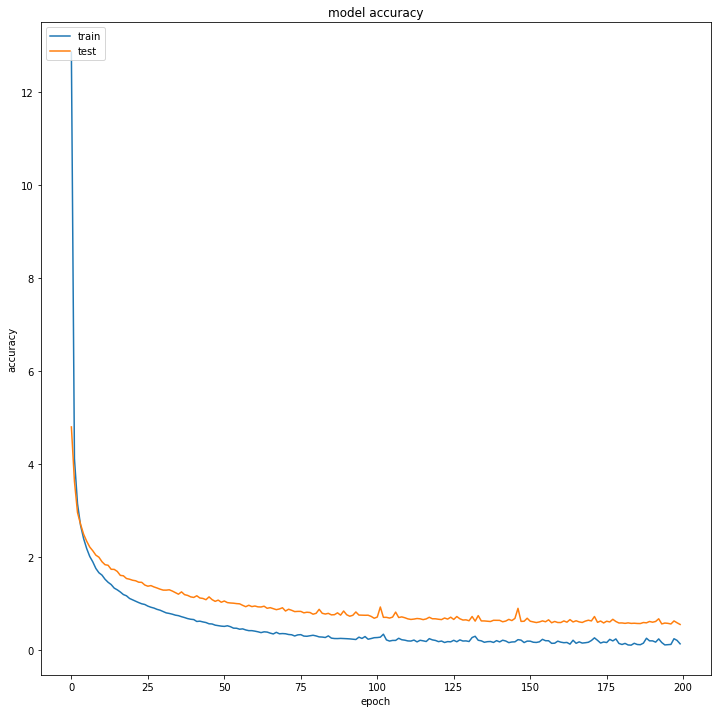

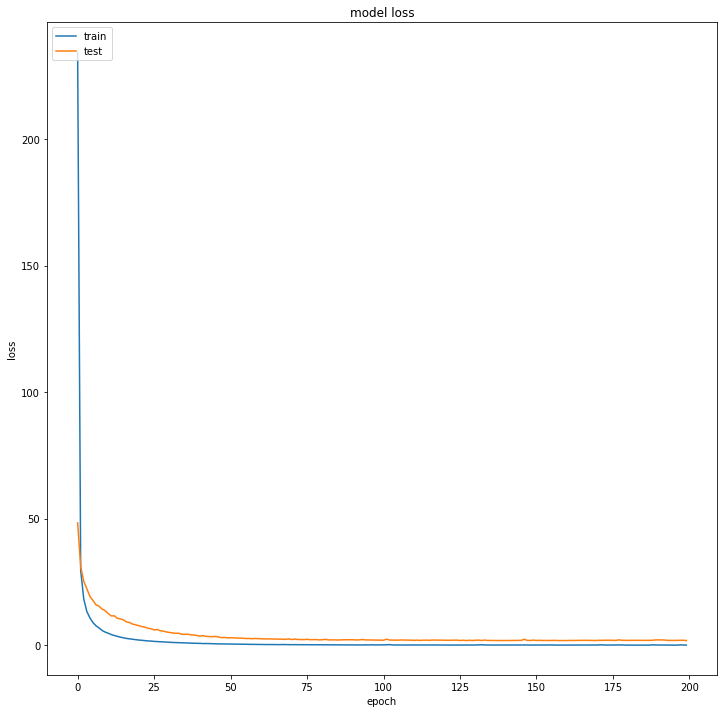

In [7]:
# summarize : accuracy
plt.subplots(figsize = (12, 12))
plt.plot(hist.history['mean_absolute_error'])
plt.plot(hist.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
# summarize : loss
plt.subplots(figsize = (12, 12))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [13]:
# 예측값 비교
label = y_test
pred = model.predict(x_test).flatten()
df_result = pd.DataFrame({'Y':label * 10000, 'Result':pred * 10000})
df_result.head(10)

,Y,Result
0,200624.0,175996.421875
1,133000.0,141121.343750
2,110000.0,103986.734375
3,192000.0,192819.390625
4,88000.0,107748.156250
5,85000.0,75617.656250
6,282922.0,283527.656250
7,141000.0,137565.187500
8,745000.0,751133.375000
9,148800.0,148667.406250
